# Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Defining Gibbs sampling and sub functions

In [2]:
def neighbor_value(yc, jn, kn, y):
    
    # wyc is the cumulative value of neighbours of j,k in y weighted by w
    try:
        yc += y[jn][kn]
    except:
        pass
    return yc

def neighbours(j, k, w, y):
    
    # j, k is the current index of the input
    # wyc adds weighted neighbor values for the pixel
    
    yc = neighbor_value(0, j+1, k, y)
    yc = neighbor_value(yc, j-1, k, y)
    yc = neighbor_value(yc, j, k+1, y)
    yc = neighbor_value(yc, j, k-1, y)
    
    return w * yc

def sigmoid(S):
    return 1/(1+np.exp(-S))


def conditional_prob(j, k, w, b, y):
    # i, j is the index of w
    
    wyc = neighbours(j, k, w, y) #wyc is w*y cummulated for neighbours with yi=1
    
    S = 2 * b[j][k] + 2 * wyc
    
    return sigmoid(S)


def Gibbs(iter_max, b, w,y):
    # iter_max : maximum number of iterations
    # b,w : parameters
    # y : initial input

    length,width=np.shape(b) # input dimensions
    for t in range(iter_max):
        ytemp = y #
        for k in range(width):
            for j in range(length):
                pi = conditional_prob(j,k,w,b,ytemp)
                r = np.random.rand(1)
                # sampling
                if r>pi: 
                    ytemp[j][k]=-1
                else:
                    ytemp[j][k]=+1
        y = ytemp # updating y to new value

    return y



# Running Gibbs sample on a noisy image to clean it

In [7]:
# reading image

img = mpimg.imread('Data/im_noisy.png')  
yin = np.zeros(np.shape(img))
yin[ img == 0 ] = -1

# hyper parameters    

b = 0.5 * yin      # 0.5 being the factor that determines how close to the original input we want to be
w = 0.5            # smoothing factor

iter_max=100       # iterations in one gibbs sampling run
iters=50           # total number of times we want to run the gibbs sampler


mean_gibbs = np.zeros(np.shape(img))
yn = np.ones(np.shape(b))
            
for i in range(iters):
    
    y = Gibbs(iter_max, b, w, yn)
    mean_gibbs += y
    
    if i%5==0:
        print('iteration: ',i)
    
mean_gibbs = mean_gibbs/iters


clean_img = mpimg.imread('Data/im_clean.png')  

clean_img[ clean_img == 0 ] = -1



iteration:  0
iteration:  5
iteration:  10
iteration:  15
iteration:  20
iteration:  25
iteration:  30
iteration:  35
iteration:  40
iteration:  45


# Plotting Input and output images 

Absolute Difference  =  0.9512909090909091


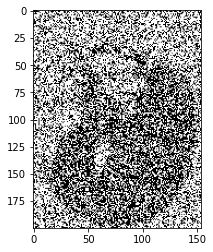

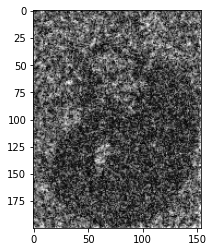

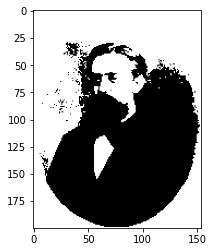

In [8]:
length, width = np.shape(img)

fig,ax = plt.subplots()
ax.imshow(-yin,cmap='Greys')

fig,ax = plt.subplots()
ax.imshow(-mean_gibbs,cmap='Greys')

fig,ax = plt.subplots()
ax.imshow(-clean_img,cmap='Greys')

diff=np.abs(mean_gibbs-clean_img)
absdiff=np.sum(diff)/(length*width)
print('Absolute Difference  = ', absdiff)
